In [1]:
%matplotlib inline
from physt import histogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Creating a histogram

In [2]:
# Basic dataset
heights = [160, 155, 156, 198, 177, 168, 191, 183, 184, 179, 178, 172, 173, 175,
           172, 177, 176, 175, 174, 173, 174, 175, 177, 169, 168, 164, 175, 188,
           178, 174, 173, 181, 185, 166, 162, 163, 171, 165, 180, 189, 166, 163,
           172, 173, 174, 183, 184, 161, 162, 168, 169, 174, 176, 170, 169, 165]

hist = histogram(heights, 10) 
hist

Histogram1D(bins=10, total=56.0)

In [3]:
# Limit bins
hist2 = histogram(heights, bins=7, range=(170, 190))
hist2

Histogram1D(bins=7, total=56.0, underflow=19.0, overflow=2.0)

*total* == *underflow* + *overflow* + *sum(frequencies)*

## Data representation

In [4]:
hist2.bins              # Numpy array with left and right edges

array([[ 170.        ,  172.85714286],
       [ 172.85714286,  175.71428571],
       [ 175.71428571,  178.57142857],
       [ 178.57142857,  181.42857143],
       [ 181.42857143,  184.28571429],
       [ 184.28571429,  187.14285714],
       [ 187.14285714,  190.        ]])

In [5]:
hist2.frequencies       # Numpy array with frequencies

array([  5.,  13.,   7.,   3.,   4.,   1.,   2.])

## Indexing

Supported indexing is more or less compatible with numpy arrays.

In [6]:
hist2.find_bin(173)           # Find a proper bin for some value (0 - based indices)

1

In [7]:
hist2[5]                      # Return the bin (with frequency)

(array([ 184.28571429,  187.14285714]), 1.0)

In [8]:
hist2[-3:]                    # Sub-histogram (as slice)

Histogram1D(bins=3, total=56.0, underflow=47.0, overflow=2.0)

In [9]:
hist2[hist2.frequencies > 5]  # Masked array (destroys underflow & overflow information)

Histogram1D(bins=2, total=20.0, underflow=nan, overflow=nan)

In [10]:
hist2[[1, 3, 5]]              # Select some of the bins

Histogram1D(bins=3, total=17.0, underflow=nan, overflow=nan)

## Plotting

This is currently based on matplotlib, but other tools might come later (d3.js, bokeh?)

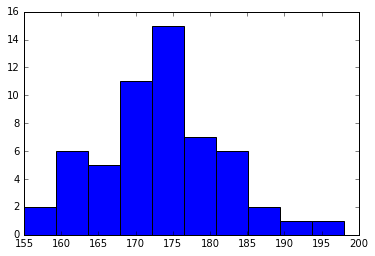

In [11]:
hist.plot();

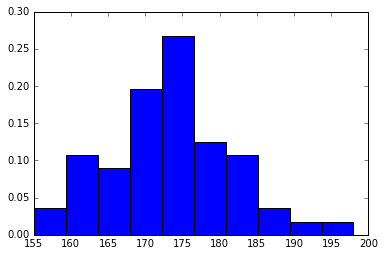

In [12]:
hist.plot(density=True);

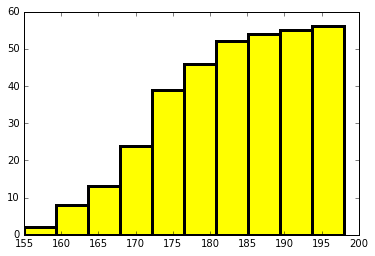

In [13]:
hist.plot(cumulative=True, color="yellow", lw=3);

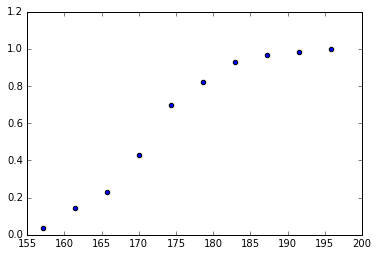

In [14]:
hist.plot(histtype="scatter", cumulative=True, density=True);

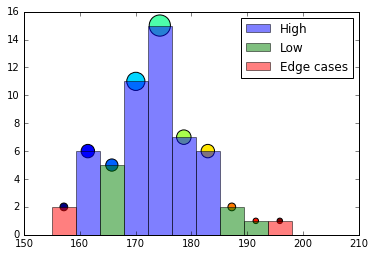

In [15]:
# Plot different bins using different styles
axis = hist[hist.frequencies > 5].plot(label="High", alpha=0.5)
hist[1:-1][hist[1:-1].frequencies <= 5].plot(axis=axis, color="green", label="Low", alpha=0.5)
hist[[0, -1]].plot(axis=axis, color="red", label="Edge cases", alpha=0.5)
hist.plot(histtype="scatter", axis=axis, c=range(hist.bin_count), s=hist.frequencies * 30)
axis.legend();

## Adding new values

### Single values

After 0 batches: Histogram1D(bins=80, total=10000.0, underflow=364.0)
After 1 batches: Histogram1D(bins=80, total=20000.0, underflow=364.0)
After 2 batches: Histogram1D(bins=80, total=30000.0, underflow=364.0)
After 3 batches: Histogram1D(bins=80, total=40000.0, underflow=364.0, overflow=373.0)


Histogram1D(bins=80, total=40000.0, underflow=364.0, overflow=373.0)

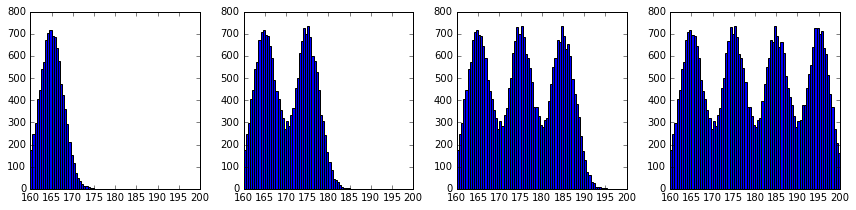

In [16]:
figure, axes = plt.subplots(1, 4, figsize=(12, 3))

hist3 = histogram([], bins=80, range=(160, 200))

for i, ax in enumerate(axes):
    for height in np.random.normal(165 + 10 * i, 2.8, 10000):
        hist3.fill(height)
    hist3.plot(axis=ax);
    print("After {0} batches: {1}".format(i, hist3))
figure.tight_layout()
hist3

### Add histograms with same binning

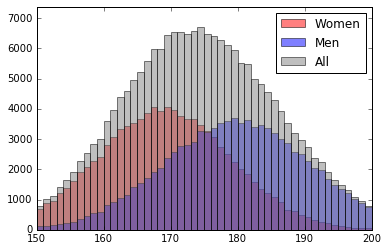

In [17]:
heights1 = histogram(np.random.normal(169, 10, 100000), bins=50, range=(150, 200))
heights2 = histogram(np.random.normal(180, 11, 100000), bins=50, range=(150, 200))


total = heights1 + heights2

axis = heights1.plot(label="Women", color="red", alpha=0.5)
heights2.plot(label="Men", color="blue", alpha=0.5, axis=axis)
total.plot(label="All", color="gray", alpha=0.5, axis=axis)
axis.legend();

## Compatibility

In [18]:
# Convert to pandas dataframe
hist.to_dataframe()

,left,right,frequency
0,155.0,159.3,2.0
1,159.3,163.6,6.0
2,163.6,167.9,5.0
3,167.9,172.2,11.0
4,172.2,176.5,15.0
5,176.5,180.8,7.0
6,180.8,185.1,6.0
7,185.1,189.4,2.0
8,189.4,193.7,1.0
9,193.7,198.0,1.0


In [19]:
# Works on pandas dataseries
series = pd.Series(heights)
histogram(series)

Histogram1D(bins=50, total=56.0)